# Missing analysis for AWARE-iOS

We are analyzing missingness of sensor streams. Current investigations focuses on screen on/off, location, step-count (in future, activity pattern) because they are likely related to sleep.

This document is in-progress.


In [1]:
import mysql.connector as mysql
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt
import json
import pdb

In [2]:
!pwd

/Users/mash2/Dropbox (PAC LAB)/codes/ionic_projects/SARAV3/SARA_modular/server_side_scripts/aware/data_checks


In [3]:
%%javascript
//toggle scrolling for jupyter notebooks.
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def getSqlConfigFromJSON(configFileName):
    """
    Loads full mysql connect object from database returns the value as a JSON object. Format of the JSON object 
    is the following:
    
        {
            "host": "hostname.com",
            "port": 99999,
            "user": "root",
            "passwd": "passworkd",
            "database": "database_or_schema_name"
        }
        
    """
    
    with open(configFileName) as f:
        mysqlConnectObject = json.load(f)
        
    return mysqlConnectObject

## Screen time

The following code plots screen usage against time. We investigate missingness and the plots show that we miss data often for days. This observation is consistent with Vincent. Vincent, in his analysis, excluded days when there is no data. Although it is so far unclear, if the missing days are related to mental health. 

In the plot below, value 2 of screen usage is turning on the screen, 3 is turning off the screen.

Fetching data
creating data frame
using data as index


/Users/mash2/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


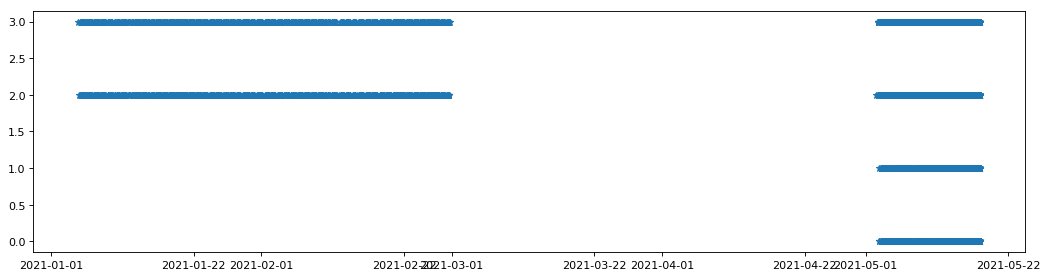

In [5]:
def getScreenUsageDataFrame():
    """
    Select screen usage data points into the test database.
    """

    print('Fetching data')
    
    #get sql connect config
    mysqlConnectObject = getSqlConfigFromJSON('./awareSqlConfig.json')

    # connect to db
    db = mysql.connect(
        host = mysqlConnectObject["host"],
        port = mysqlConnectObject["port"],
        user = mysqlConnectObject["user"],
        passwd = mysqlConnectObject["passwd"],
        database = mysqlConnectObject["database"]
    )
    cursor = db.cursor()

    # fetch data.
    cursor.execute("SELECT * FROM screen order by timestamp desc;")
    recordsInScreenTable = cursor.fetchall()

    # initialize variables
    dateStringForAppUsageList = []
    timestampForAppUsageList = []
    screenTimeValueList = []
    
    print('creating data frame')
    for row in recordsInScreenTable:
        
        ts = row[1]/1000 - 7*60*60 #convert to pacific timezone. ToDo: change fixed value.
        timestampForAppUsageList.append(ts)
        
        datetime_ts = datetime.utcfromtimestamp(ts) 
        dateStringForAppUsageList.append(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p'))
        # pdb.set_trace()
        screenTimeValueList.append(int(json.loads(row[3])["screen_status"]))
        # pdb.set_trace()
        
        
        
    appUsageData = {
        'date': dateStringForAppUsageList,
        'screenTime': screenTimeValueList   
    }
    
    #-- convert to pandas dataframe, with time based indexing
    appUsageDataFrame = pd.DataFrame(appUsageData, columns = ['date','screenTime']) 
    print('using data as index')
    appUsageDataFrame['date'] = pd.to_datetime(appUsageDataFrame['date'], format='%Y-%m-%d %I:%M:%S %p')
    
    return appUsageDataFrame

appUsageDataFrame = getScreenUsageDataFrame()
appUsageDataFrame.dtypes 

plt.figure(figsize=(16, 4), dpi=80)
plt.plot(appUsageDataFrame['date'], appUsageDataFrame['screenTime'], '*')




In [6]:
appUsageDataFrame

,date,screenTime
0,2021-05-17 21:12:57,0
1,2021-05-17 21:12:51,3
2,2021-05-17 21:12:46,2
3,2021-05-17 21:12:46,1
4,2021-05-17 21:12:37,2
5,2021-05-17 21:12:37,0
6,2021-05-17 21:12:26,2
7,2021-05-17 21:12:26,1
8,2021-05-17 21:12:24,2
9,2021-05-17 21:12:24,0


## GPS data

The following code plots gps latitude against time. We investigate missingness and the plots show that we miss data often for days. 

In [7]:
def getLocationDataFrame():
    """
    Select location data points into the test database.
    """

    print('Fetching data')

    #get sql connect config
    mysqlConnectObject = getSqlConfigFromJSON('./awareSqlConfig.json')
    
    # connect to db
    db = mysql.connect(
        host = mysqlConnectObject["host"],
        port = mysqlConnectObject["port"],
        user = mysqlConnectObject["user"],
        passwd = mysqlConnectObject["passwd"],
        database = mysqlConnectObject["database"]
    )
    cursor = db.cursor()

    # fetch data.
    cursor.execute("SELECT * FROM locations order by timestamp desc;")
    recordsInGpsTable = cursor.fetchall()

    # initialize variables
    dateStringForAppUsageList = []
    timestampForAppUsageList = []
    locationDataValueList = []
    
    print('creating data frame')
    for row in recordsInGpsTable:
        #print(row)
        ts = row[1]/1000 - 7*60*60 #convert to pacific timezone. ToDo: change fixed value.
        timestampForAppUsageList.append(ts)
        
        datetime_ts = datetime.utcfromtimestamp(ts) 
        dateStringForAppUsageList.append(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p'))
        
        locationDataValueList.append(row[3])
        
        #print(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p') + ", " + str(row[3]))
        #print(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p'))
        
        
    locationData = {
        'date': dateStringForAppUsageList,
        #'timestamp': timestampForAppUsageList,
        'location_lat': locationDataValueList   
    }
    
    #-- convert to pandas dataframe, with time based indexing
    locationDataFrame = pd.DataFrame(locationData, columns = ['date','location_lat']) 
    print('using data as index')
    locationDataFrame['date'] = pd.to_datetime(locationDataFrame['date'], format='%Y-%m-%d %I:%M:%S %p')
    
    return locationDataFrame

locationDataFrame = getLocationDataFrame()
locationDataFrame.dtypes 

plt.figure(figsize=(16, 4), dpi=80)
plt.plot(locationDataFrame['date'], locationDataFrame['location_lat'], '*')


    

Fetching data


ProgrammingError: 1049 (42000): Unknown database 'saraaware'

## Step count

The following code plots step count against time. We investigate missingness and the plots show that we miss data often for days. Step count has less missing than 

In [ ]:
def getStepCountDataFrame():
    """
    Select step count data points into the test database.
    """

    
    print('Fetching data')
    
    #get sql connect config
    mysqlConnectObject = getSqlConfigFromJSON('./awareSqlConfig.json')

    # connect to db
    db = mysql.connect(
        host = mysqlConnectObject["host"],
        port = mysqlConnectObject["port"],
        user = mysqlConnectObject["user"],
        passwd = mysqlConnectObject["passwd"],
        database = mysqlConnectObject["database"]
    )
    cursor = db.cursor()

    # fetch data.
    cursor.execute("SELECT * FROM saraaware.plugin_ios_pedometer order by timestamp desc;")
    recordsInStepTable = cursor.fetchall()

    # initialize variables
    dateStringForAppUsageList = []
    timestampForAppUsageList = []
    stepCountDataValueList = []
    
    #print('creating data frame ' + len(recordsInTestTable))
    for row in recordsInStepTable:
        #print(row)
        ts = row[1]/1000 - 7*60*60 #convert to pacific timezone. ToDo: change fixed value.
        timestampForAppUsageList.append(ts)
        
        datetime_ts = datetime.utcfromtimestamp(ts) 
        dateStringForAppUsageList.append(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p'))
        
        stepCountDataValueList.append(row[5])
        
        #print(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p') + ", " + str(row[3]))
        #print(datetime_ts.strftime('%Y-%m-%d %I:%M:%S %p'))
        
        
    stepCountData = {
        'date': dateStringForAppUsageList,
        #'timestamp': timestampForAppUsageList,
        'stepCount': stepCountDataValueList   
    }
    
    
    #-- convert to pandas dataframe, with time based indexing
    stepCountDataFrame = pd.DataFrame(stepCountData, columns = ['date','stepCount']) #, parse_dates=['date'], index_col="date")
    print('using data as index')
    stepCountDataFrame['date'] = pd.to_datetime(stepCountDataFrame['date'], format='%Y-%m-%d %I:%M:%S %p')
    
    return stepCountDataFrame

stepCountDataFrame = getStepCountDataFrame()
stepCountDataFrame.dtypes 

plt.figure(figsize=(16, 4), dpi=80)
plt.plot(stepCountDataFrame['date'], stepCountDataFrame['stepCount'], '*')